In [4]:
import numpy as np
from tqdm import tqdm
import pandas as pd
from scipy import stats

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

import blueice as bi
from laidbax import base_model

In [5]:
# Read the SR0 data
data = pd.read_csv(base_model.THIS_DIR + '/data/sr0_search_data.csv')
data['cs1'] = data['cs1_pe']
data['cs2'] = data['cs2_bottom_pe']

In [73]:
# I want speed, not accuracy
base_model.config['pdf_sampling_multiplier'] = 0.1
base_model.config['wimp_interaction'] = 'SD_n_central'
base_model.config['wimp_sigma_nucleon'] = 1e-40

# Nominal g2
g2 = base_model.config['s2_gain']

In [77]:
ll.base_model.expected_events()

array([  6.13944709e+01,   8.23858647e-04,   5.85557530e-02,
         2.19999999e-01,   5.20000005e-01,   9.00037008e-02,
         1.06348870e+01])

In [69]:
# d_no_outlier = data.drop(61)

In [74]:
ms = np.array([10, 30, 50, 100, 200, 1000])

In [75]:
ll = bi.UnbinnedLogLikelihood(base_model.config)
ll.add_rate_parameter('wimp')
ll.add_rate_parameter('er')
ll.add_shape_parameter('wimp_mass', ms)
#ll.add_shape_parameter('er_qy_1', [-2, 1, 0, 1, 2], log_prior=stats.norm(0, 1).logpdf)
#ll.add_shape_parameter('s2_gain', np.linspace(0.9, 1.1, 5) * g2, log_prior=stats.norm(g2, 0.04 * g2).logpdf)
ll.prepare()
ll.set_data(d_no_outlier)

Computing/loading models on one core: 100%|██████████| 6/6 [00:19<00:00,  3.27s/it]


In [81]:
limits = np.array([ll.one_parameter_interval('wimp_rate_multiplier', bound=10,
                                             wimp_mass=float(m),
                                             bestfit_routine='scipy',
                                             minimize_kwargs=dict(method='Powell'))
                  for m in tqdm(ms)
                  ])


100%|██████████| 6/6 [00:00<00:00, 10.56it/s]


In [94]:
def parse_blob(blob):
    for q in '\t\n;[],':
        blob = blob.replace(q, ' ')
    m, x = np.array([float(x) 
                     for x in blob.split()]).reshape(-1, 2).T
    return [m, x]

lux_sd_n = parse_blob("5.00000 1.98344e-01;5.52605 3.64281e-02;6.10744 9.37535e-03;6.75001 3.18144e-03;7.46017 1.34066e-03;8.24506 6.69068e-04;9.11252 3.80429e-04;10.07125 2.37139e-04;11.13084 1.57209e-04;12.30192 1.10395e-04;13.59620 8.13721e-05;15.02665 6.13023e-05;16.60760 4.71146e-05;18.35489 3.74082e-05;20.28600 3.07432e-05;22.42029 2.60635e-05;24.77912 2.27159e-05;27.38613 2.02841e-05;30.26742 1.84934e-05;33.45185 1.71567e-05;36.97132 1.61403e-05;40.86107 1.66111e-05;45.16005 1.71896e-05;49.91134 1.78693e-05;55.16250 1.86624e-05;60.96614 1.95836e-05;67.38038 2.06505e-05;74.46946 2.18870e-05;82.30438 2.33619e-05;90.96361 2.51942e-05;100.53388 2.75371e-05;111.11103 3.02441e-05;122.80101 3.32171e-05;135.72088 3.64824e-05;150.00005 4.00687e-05;165.78154 4.40076e-05;183.22339 4.83336e-05;202.50029 5.30849e-05;223.80532 5.83033e-05;247.35185 6.40347e-05;273.37570 7.03294e-05;302.13751 7.72429e-05;333.92536 8.48361e-05;369.05759 9.31757e-05;407.88609 1.02335e-04;450.79972 1.12395e-04;498.22829 1.23444e-04;550.64682 1.35578e-04;608.58029 1.48906e-04;672.60893 1.63544e-04;743.37401 1.79620e-04;821.58428 1.97278e-04;908.02304 2.16670e-04;1003.55601 2.38036e-04;1109.13999 2.63485e-04;1225.83245 2.91656e-04;1354.80210 3.22839e-04;1497.34063 3.57356e-04;1654.87561 3.95563e-04;1828.98483 4.37855e-04;2021.41205 4.84669e-04;2234.08451 5.36487e-04;2469.13221 5.93847e-04;2728.90924 6.57338e-04;3016.01738 7.27618e-04;3333.33212 8.05413e-04;3684.03150 8.91524e-04;4071.62791 9.86434e-04;4500.00327 1.08936e-03;4973.44795 1.20302e-03;5496.70367 1.32854e-03;6075.01105 1.46716e-03;6714.16206 1.62024e-03;7420.55805 1.78929e-03;8201.27386 1.97598e-03;9064.12866 2.18215e-03;10017.76430 2.40983e-03;11071.73179 2.66127e-03;12236.58705 2.93895e-03;13523.99655 3.24559e-03;14946.85422 3.58423e-03;16519.41053 3.95820e-03;18257.41526 4.37119e-03;20178.27521 4.82728e-03;22301.22855 5.33095e-03;24647.53750 5.88717e-03;27240.70126 6.50142e-03;30106.69139 7.17977e-03;33274.21192 7.92890e-03;36774.98681 8.75618e-03;40644.07772 9.66979e-03;44920.23510 1.06787e-02;49646.28636 1.17929e-02;54869.56478 1.30234e-02;60642.38354 1.43822e-02;67022.55971 1.58828e-02;74073.99326 1.75400e-02;81867.30709 1.93701e-02;90480.55432 2.13911e-02;100000.00000 2.36231e-02")
lux_sd_n[1] *= 1e-36   # Picobarn -> cm^2

(5, 10000.0)

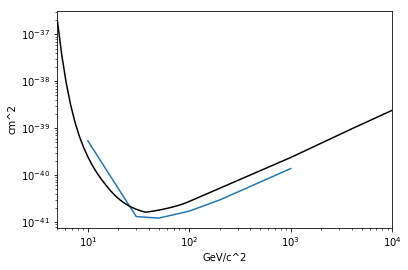

In [101]:
plt.plot(ms, limits * 1e-40)
plt.plot(*lux_sd_n, color='k')
plt.yscale('log')
plt.xscale('log')
plt.ylabel("cm^2")
plt.xlabel("GeV/c^2")
plt.xlim(5, 1e4)

# BLA

In [55]:
from tqdm import tqdm

In [56]:
bad_g2 = ll.anchor_models[(0, 1.1 * g2)]

In [57]:
lims = np.zeros(100)
for i in tqdm(range(len(lims))):
    dsim = bad_g2.simulate(rate_multipliers=dict(wimp=0))
    ll.set_data(dsim)
    lims[i] = ll.one_parameter_interval('wimp_rate_multiplier', bound=10,
                                        bestfit_routine='scipy', minimize_kwargs=dict(method='Powell'))

100%|██████████| 100/100 [01:20<00:00,  1.30it/s]


In [58]:
lims_withn = lims

In [42]:
ll = bi.UnbinnedLogLikelihood(base_model.config)
ll.add_rate_parameter('wimp')
ll.add_rate_parameter('er')
ll.prepare()

In [49]:
lims_non = np.zeros(100)
for i in tqdm(range(len(lims_non))):
    dsim = bad_g2.simulate(rate_multipliers=dict(wimp=0))
    ll.set_data(dsim)
    lims_non[i] = ll.one_parameter_interval('wimp_rate_multiplier', bound=10,
                                            bestfit_routine='scipy', minimize_kwargs=dict(method='Powell'))

100%|██████████| 100/100 [00:04<00:00, 22.95it/s]


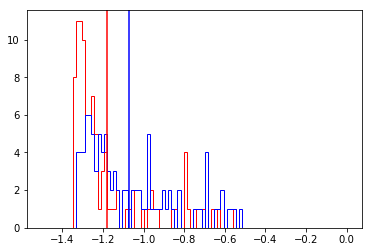

In [62]:
for q, color in (lims_non, 'r'), (lims_withn, 'b'):
    plt.hist(np.log10(q), np.linspace(-1.5, 0, 100), color=color, histtype='step');
    plt.axvline(np.mean(np.log10(q)), color=color)

In [17]:
ll.bestfit_scipy()

(OrderedDict([('wimp_rate_multiplier', 2.6163407868875142e-09),
              ('er_rate_multiplier', 1.0085480321140268),
              ('er_qy_1', 0.0024644560519492464),
              ('s2_gain', 10.033290880129329)]),
 -529.23632392141815)

In [21]:
(10.033290880129329 -g2)/g2

0.0015871972351325476

0.0711423827678873

In [19]:
ll.one_parameter_interval('wimp_rate_multiplier', bound=10,
                          bestfit_routine='scipy', minimize_kwargs=dict(method='Powell'))

0.0711423827678873

In [14]:
ll.base_model.expected_events()

array([  6.13944709e+01,   8.23858647e-04,   5.85557530e-02,
         2.19999999e-01,   5.20000005e-01,   9.00037008e-02,
         1.82738565e+01])

In [13]:
# h = ll.base_model.sources[-1]._pdf_histogram
# (h * h.bin_volumes()).plot(log_scale=True, vmin=1e-5, cblabel='events/bin')
# plt.yscale('log')